In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [5]:
# Load dataset as a pandas DataFrame (as_frame = True)

california = fetch_california_housing(as_frame=True)



In [6]:
df = california.frame.copy()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
n_rows, n_cols = df.shape
print(f"\nNumber of rows: {n_rows}")
print(f"Number of columns: {n_cols}")


Number of rows: 20640
Number of columns: 9


In [13]:
print("\nStatistical summary (describe):")
display(df.describe().T)


Statistical summary (describe):


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [16]:
min_values = df.min()
max_values = df.max()
ranges = max_values - min_values

summary_range = pd.DataFrame({
    "min": min_values,
    "max": max_values,
    "range": ranges,
})

print("\nMin, max, and range for each column:")
display(summary_range)



Min, max, and range for each column:


,min,max,range
MedInc,0.499900,15.000100,14.500200
HouseAge,1.000000,52.000000,51.000000
AveRooms,0.846154,141.909091,141.062937
AveBedrms,0.333333,34.066667,33.733333
Population,3.000000,35682.000000,35679.000000
AveOccup,0.692308,1243.333333,1242.641026
Latitude,32.540000,41.950000,9.410000
Longitude,-124.350000,-114.310000,10.040000
MedHouseVal,0.149990,5.000010,4.850020


**COVARIANCE** AND **CORRELATION**

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
cov_matrix = df.cov()
print("Covariance matrix shape:", cov_matrix.shape)
display(cov_matrix)

Covariance matrix shape: (9, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,3.609323,-2.846140,1.536568,-0.055858,1.040098e+01,0.370289,-0.323860,-0.057765,1.508475
HouseAge,-2.846140,158.396260,-4.772882,-0.463718,-4.222271e+03,1.724298,0.300346,-2.728244,1.533988
AveRooms,1.536568,-4.772882,6.121533,0.993868,-2.023337e+02,-0.124689,0.562235,-0.136518,0.433826
AveBedrms,-0.055858,-0.463718,0.993868,0.224592,-3.552723e+01,-0.030424,0.070575,0.012670,-0.025539
Population,10.400979,-4222.270582,-202.333712,-35.527225,1.282470e+06,821.712002,-263.137814,226.377839,-32.212487
AveOccup,0.370289,1.724298,-0.124689,-0.030424,8.217120e+02,107.870026,0.052492,0.051519,-0.284494
Latitude,-0.323860,0.300346,0.562235,0.070575,-2.631378e+02,0.052492,4.562293,-3.957054,-0.355326
Longitude,-0.057765,-2.728244,-0.136518,0.012670,2.263778e+02,0.051519,-3.957054,4.014139,-0.106274
MedHouseVal,1.508475,1.533988,0.433826,-0.025539,-3.221249e+01,-0.284494,-0.355326,-0.106274,1.331615


In [19]:
corr_matrix = df.corr()
print("\nCorrelation matrix shape:", corr_matrix.shape)
display(corr_matrix)


Correlation matrix shape: (9, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


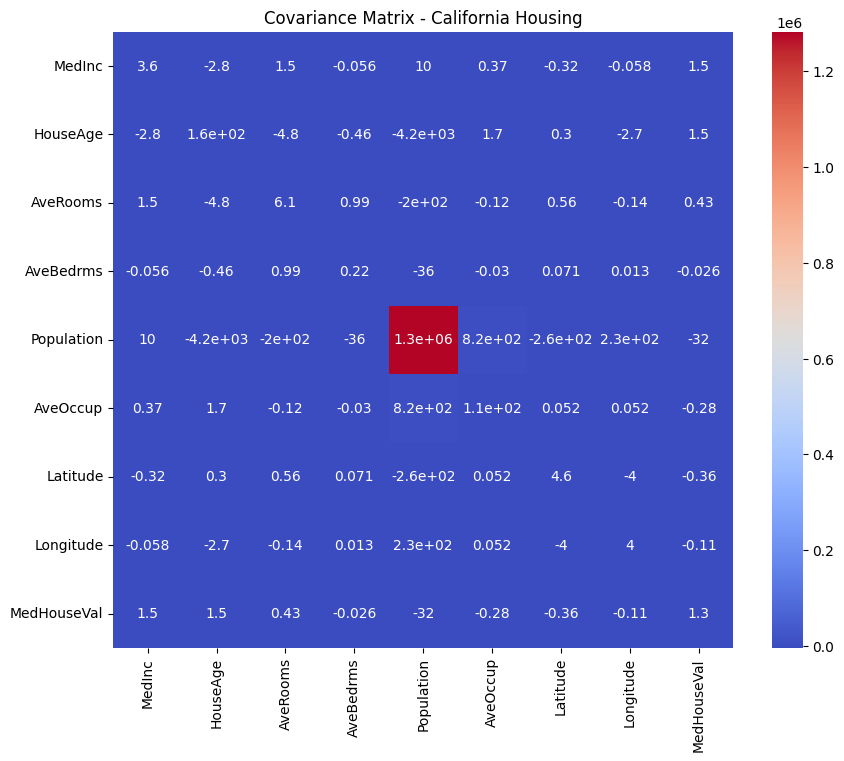

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm")
plt.title("Covariance Matrix - California Housing")
plt.show()

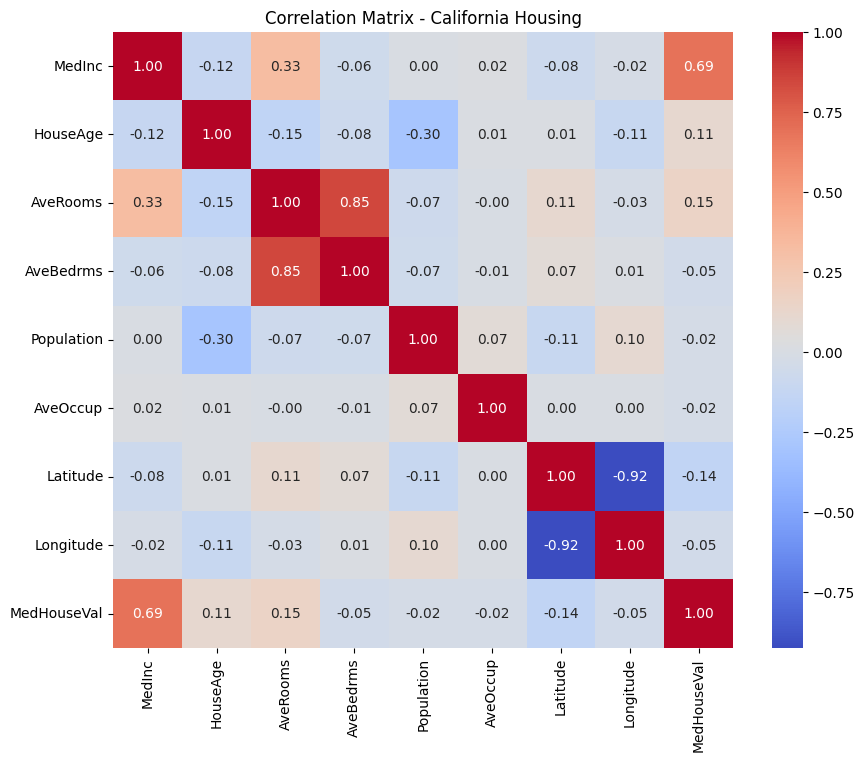

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - California Housing")
plt.show()

In [27]:
target_col = "MedHouseVal"
corr_with_target = corr_matrix[target_col].sort_values(ascending=False)
corr_without_target = corr_with_target.drop(target_col)

print(corr_without_target)


MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: MedHouseVal, dtype: float64


In [28]:
strong_pos = corr_without_target[corr_without_target > 0].sort_values(ascending=False)
strong_neg = corr_without_target[corr_without_target < 0].sort_values()

In [29]:
print("\nStrongest positive correlations with MedHouseVal:")
print(strong_pos)

print("\nStrongest negative correlations with MedHouseVal:")
print(strong_neg)


Strongest positive correlations with MedHouseVal:
MedInc      0.688075
AveRooms    0.151948
HouseAge    0.105623
Name: MedHouseVal, dtype: float64

Strongest negative correlations with MedHouseVal:
Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
Name: MedHouseVal, dtype: float64


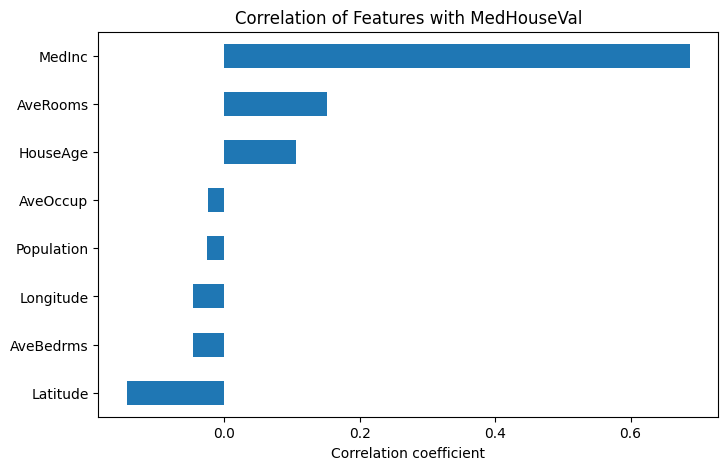

In [30]:
plt.figure(figsize=(8, 5))
corr_without_target.sort_values().plot(kind='barh')
plt.title("Correlation of Features with MedHouseVal")
plt.xlabel("Correlation coefficient")
plt.show()

In [32]:
# Get upper triangle of covariance matrix (to avoid duplicates)
cov_abs = cov_matrix.abs()
cov_abs_values = cov_abs.where(
    ~np.tril(np.ones(cov_abs.shape, dtype=bool))  # keep upper triangle only
)
cov_abs_values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,NaN,2.84614,1.536568,0.055858,10.400979,0.370289,0.323860,0.057765,1.508475
HouseAge,NaN,NaN,4.772882,0.463718,4222.270582,1.724298,0.300346,2.728244,1.533988
AveRooms,NaN,NaN,NaN,0.993868,202.333712,0.124689,0.562235,0.136518,0.433826
AveBedrms,NaN,NaN,NaN,NaN,35.527225,0.030424,0.070575,0.012670,0.025539
Population,NaN,NaN,NaN,NaN,NaN,821.712002,263.137814,226.377839,32.212487
AveOccup,NaN,NaN,NaN,NaN,NaN,NaN,0.052492,0.051519,0.284494
Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.957054,0.355326
Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106274
MedHouseVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Stack to a Series and sort by value
cov_pairs = cov_abs_values.stack().sort_values(ascending=False)
cov_pairs

HouseAge    Population     4222.270582
Population  AveOccup        821.712002
            Latitude        263.137814
            Longitude       226.377839
AveRooms    Population      202.333712
AveBedrms   Population       35.527225
Population  MedHouseVal      32.212487
MedInc      Population       10.400979
HouseAge    AveRooms          4.772882
Latitude    Longitude         3.957054
MedInc      HouseAge          2.846140
HouseAge    Longitude         2.728244
            AveOccup          1.724298
MedInc      AveRooms          1.536568
HouseAge    MedHouseVal       1.533988
MedInc      MedHouseVal       1.508475
AveRooms    AveBedrms         0.993868
            Latitude          0.562235
HouseAge    AveBedrms         0.463718
AveRooms    MedHouseVal       0.433826
MedInc      AveOccup          0.370289
Latitude    MedHouseVal       0.355326
MedInc      Latitude          0.323860
HouseAge    Latitude          0.300346
AveOccup    MedHouseVal       0.284494
AveRooms    Longitude         0.136518
            AveOccup          0.124689
Longitude   MedHouseVal       0.106274
AveBedrms   Latitude          0.070575
MedInc      Longitude         0.057765
            AveBedrms         0.055858
AveOccup    Latitude          0.052492
            Longitude         0.051519
AveBedrms   AveOccup          0.030424
            MedHouseVal       0.025539
            Longitude         0.012670
dtype: float64

In [36]:
# my test
print("Top 10 absolute covariance pairs:")
print(cov_pairs.head(10))

Top 10 absolute covariance pairs:
HouseAge    Population     4222.270582
Population  AveOccup        821.712002
            Latitude        263.137814
            Longitude       226.377839
AveRooms    Population      202.333712
AveBedrms   Population       35.527225
Population  MedHouseVal      32.212487
MedInc      Population       10.400979
HouseAge    AveRooms          4.772882
Latitude    Longitude         3.957054
dtype: float64


In [48]:
# my test
for i,j in enumerate(cov_pairs):
  print(i,j)
  if i == 5:
    break

0 4222.270582223539
1 821.712001633657
2 263.13781367855165
3 226.37783864821282
4 202.3337123669731
5 35.52722531511622


In [51]:
# my test
m = 0
for i,j in cov_pairs.items():
  print(i,j)
  m += 1
  if m == 5:
    break


('HouseAge', 'Population') 4222.270582223539
('Population', 'AveOccup') 821.712001633657
('Population', 'Latitude') 263.13781367855165
('Population', 'Longitude') 226.37783864821282
('AveRooms', 'Population') 202.3337123669731


In [52]:
# my test
print(type(cov_pairs))

<class 'pandas.core.series.Series'>


In [54]:
THRESHOLD_STRONG_CORR = 0.5

for (feat1, feat2), cov_val in cov_pairs.items():
    corr_val = corr_matrix.loc[feat1, feat2]
    if abs(corr_val) < THRESHOLD_STRONG_CORR:
        chosen_pair = (feat1, feat2, cov_val, corr_val)
        break


feat1, feat2, cov_val, corr_val = chosen_pair
print(f"\nChosen pair: {feat1} & {feat2}")
print(f"Covariance: {cov_val}")
print(f"Correlation: {corr_val}")


Chosen pair: HouseAge & Population
Covariance: 4222.270582223539
Correlation: -0.29624423977353637


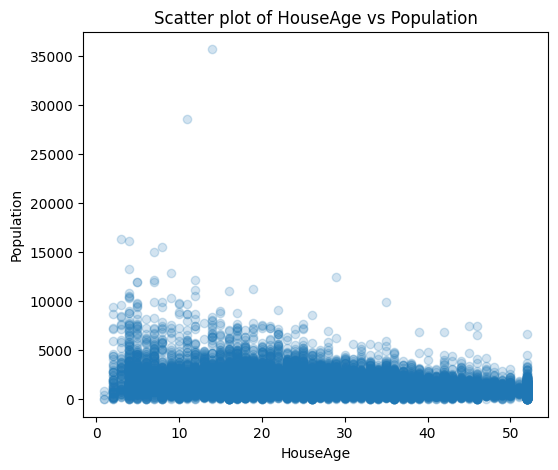

In [58]:
plt.figure(figsize=(6, 5))
plt.scatter(df[feat1], df[feat2], alpha=0.2)
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title(f"Scatter plot of {feat1} vs {feat2}")
plt.show()

In [59]:
# Demonstrate effect of scaling on covariance and correlation

x_col = "MedInc"
y_col = "MedHouseVal"

X = df[x_col]
Y = df[y_col]

scale_factor = 1000
X_scaled = X * scale_factor

cov_original = np.cov(X, Y, ddof=1)[0, 1]
corr_original = np.corrcoef(X, Y)[0, 1]

cov_scaled = np.cov(X_scaled, Y, ddof=1)[0, 1]
corr_scaled = np.corrcoef(X_scaled, Y)[0, 1]

print(f"Original covariance (X, Y): {cov_original}")
print(f"Scaled covariance (X_scaled, Y): {cov_scaled}")

print(f"\nOriginal correlation (X, Y): {corr_original}")
print(f"Scaled correlation (X_scaled, Y): {corr_scaled}")


Original covariance (X, Y): 1.5084748279266043
Scaled covariance (X_scaled, Y): 1508.4748279266043

Original correlation (X, Y): 0.6880752079585475
Scaled correlation (X_scaled, Y): 0.6880752079585475
